In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from histogram_equalization import *
from clahe_helper import *

# Import data
img1 = cv.imread('img1.png',0)
img2 = cv.imread('img2.png',0)

Text(0.5, 1.0, 'Image 2')

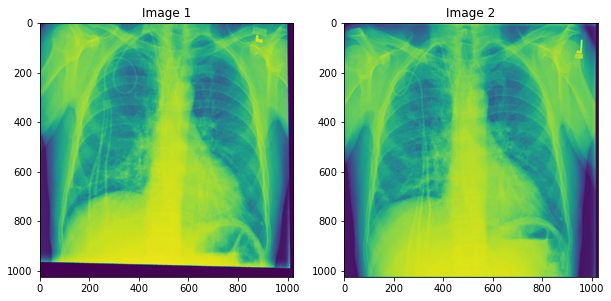

In [15]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(img1)
ax[0].set_title("Image 1")
ax[1].imshow(img2)
ax[1].set_title("Image 2")

#fig.savefig('OG.jpg')

# Part 1


In [3]:
def geo_transform(img,ogtitle):
    """
        Geometric transformation:-
            Translation => tx = 5.5 and ty = 4.4 pixels
            Rotation about the center of image => 35 and -125 degrees
            Scaling factor => 0.4 and 1.4

        All of this using Bilinear Interpolation
        Note all base operation in opencv are done using INTER_LINEAR as a default
        which is bilinear interpolation
    """
    # Define Constants
    rows,cols = img.shape[:2]
    tx = 5.5
    ty = 4.4
    scale1 = 0.4
    scale2 = 1.4
    rot1 = 35
    rot2 = -125

    # Translation
        # Transformation matrix = [[1,0,tx],[0,1,ty]]
    M = np.float32([[1,0,tx],[0,1,ty]])
    trans = cv.warpAffine(img,M,(cols,rows))

    # Rotation
    M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),rot1,1)
    rotation1 = cv.warpAffine(img,M,(cols,rows))

    M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),rot2,1)
    rotation2 = cv.warpAffine(img,M,(cols,rows))

    # Scaling This is where interpolation starts mattering
    rescale1 = cv.resize(img,(int(scale1*cols),int(scale1*rows)))
    rescale2 = cv.resize(img,(int(scale2*cols),int(scale2*rows)))

    # Plotting the results
    fig,axs = plt.subplots(2,3,figsize=(15,10))
    titles = [f'Original {ogtitle}','Translation','Rotation 35','Rotation -125','Rescaled (factor = 0.4)','Rescaled (factor = 1.4)']
    for ax,image,title in zip(axs.ravel(),[img,trans,rotation1,rotation2,rescale1,rescale2],titles):
        ax.imshow(image,cmap = 'gray')
        ax.set_title(title)
    
    #fig.savefig(f'Transformed_{ogtitle}.jpg')

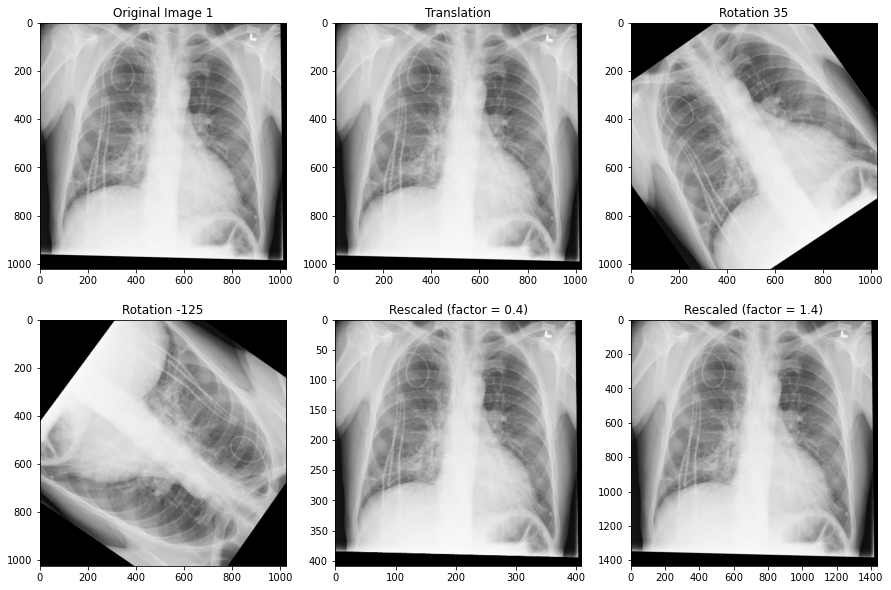

In [4]:
geo_transform(img1, 'Image 1')

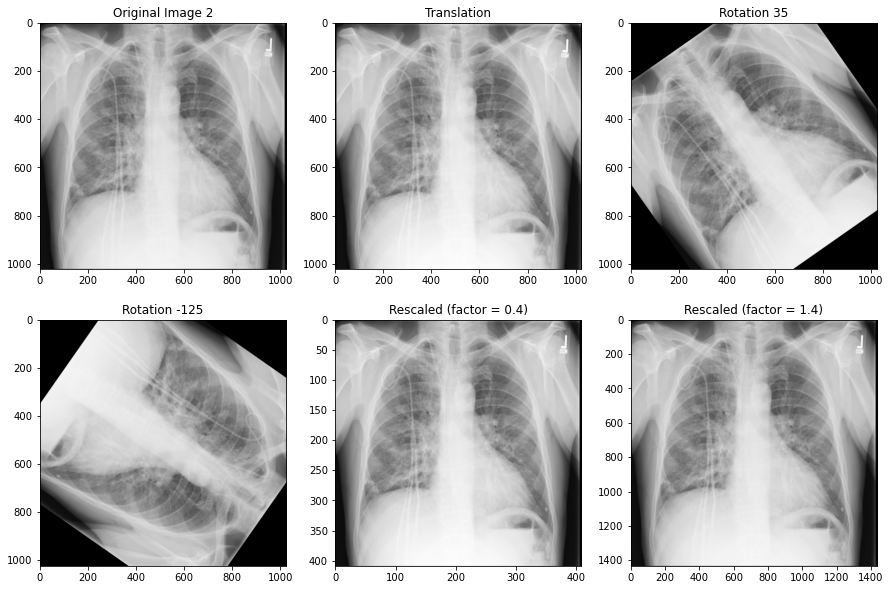

In [5]:
geo_transform(img2, 'Image 2')

# Part 2

In [6]:
"""
    Histogram Equilisation from scratch
"""

def hist_equ(img, name):
    #equ = cv.equalizeHist(img)
    equ = histogram_equ(img)
    
    flat = img.flatten()
    flat2 = equ.flatten()

    fig, ax = plt.subplots(2,2,figsize=(25,15))
    ax[0,0].imshow(img, cmap='gray')
    ax[0,0].set_title('Original Image')
    ax[0,1].imshow(equ, cmap='gray')
    ax[0,1].set_title('Histogram Equalized Image')
    ax[1,0].hist(flat,bins=255)
    ax[1,1].hist(flat2,bins=255)

    #fig.savefig(f'HE_{name}.jpg')

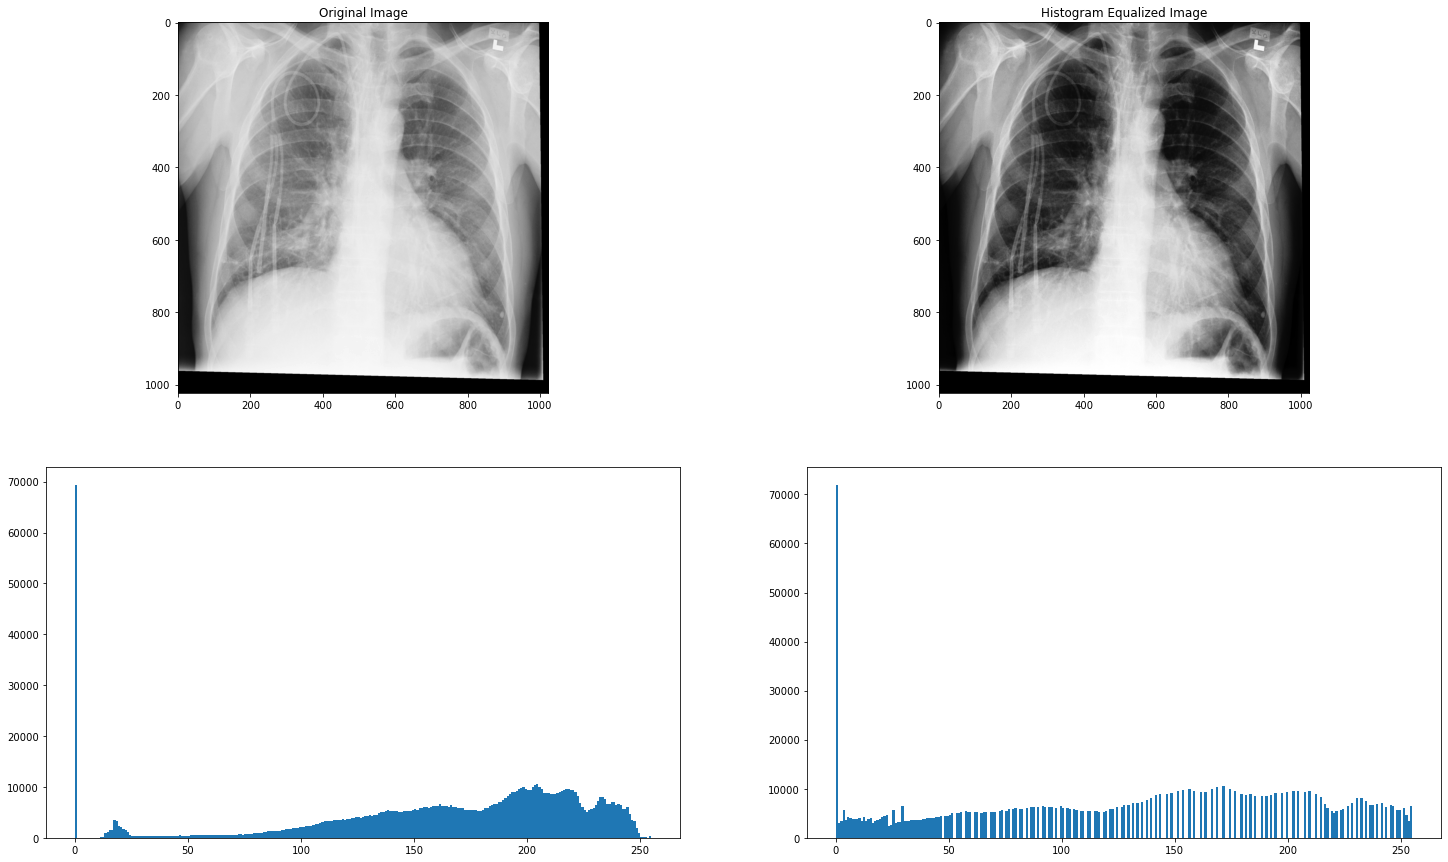

In [7]:
hist_equ(img1,'Image1')

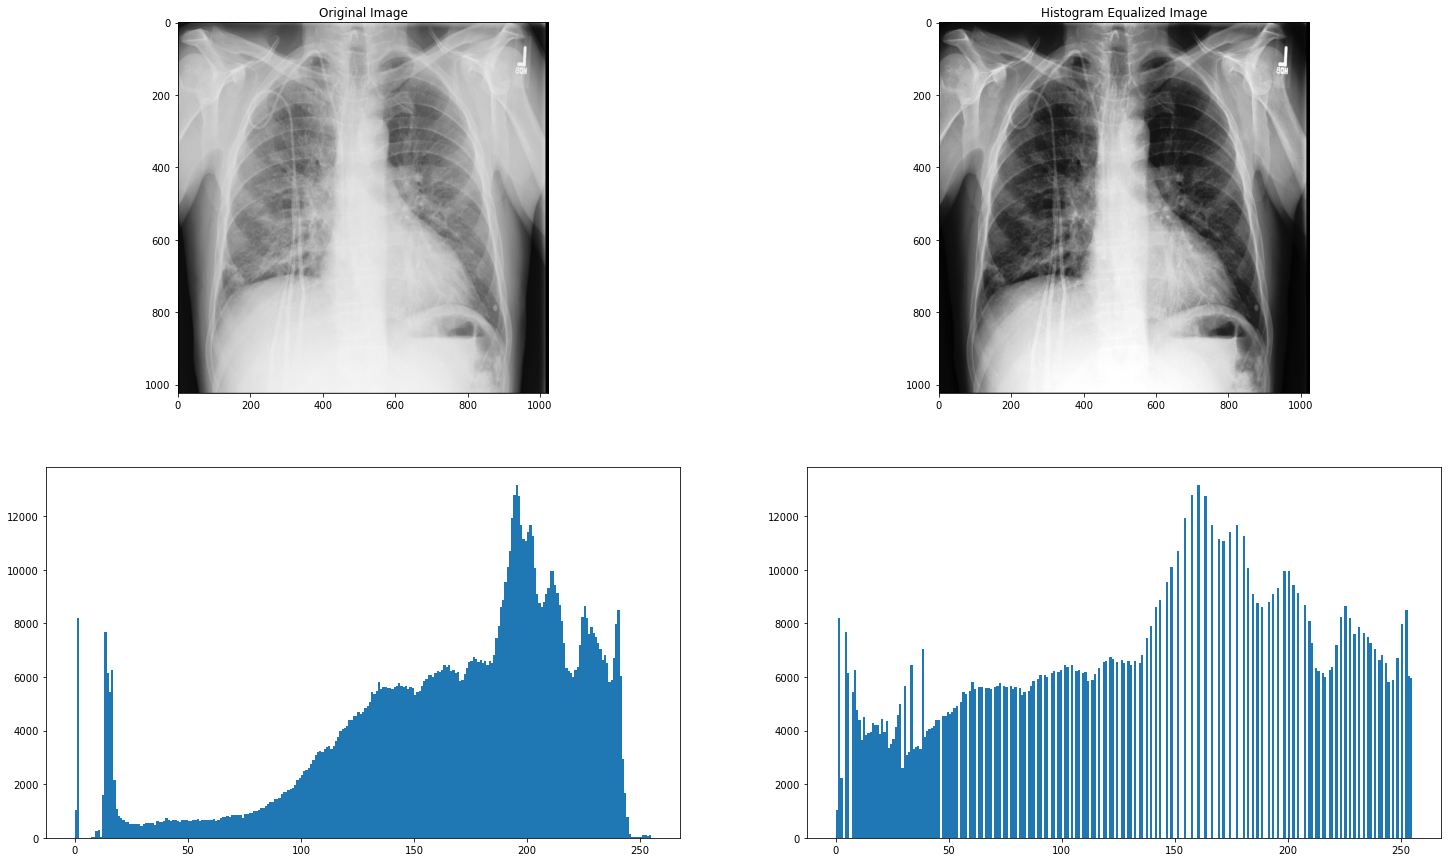

In [8]:
hist_equ(img2,'Image2')

# Part 3


In [9]:
# Var = 20 amount = 0.05
# var = 100, amount = 0.25

img1_values1 = clahe(img1,20,0.05)
img1_values2 = clahe(img1,100,0.25)
img2_values1 = clahe(img2,20,0.05)
img2_values2 = clahe(img2,100,0.25)

data1 = {'Image 1 Salt and Pepper': img1_values1[0],
        'Image 1 Guassian':img1_values1[1],
        'Image 2 Salt and Pepper': img2_values1[0],
        'Image 2 Guassian':img2_values1[1]}
data2 = {'Image 1 Salt and Pepper': img1_values2[0],
        'Image 1 Guassian':img1_values2[1],
        'Image 2 Salt and Pepper': img2_values2[0],
        'Image 2 Guassian':img2_values2[1]}
df1 = pd.DataFrame(data1,index=['Mean','Median','Gaussian'])
df2 = pd.DataFrame(data2,index=['Mean','Median','Gaussian'])

df = pd.concat([ df1, df2 ], keys={ 'Variance Set 1' : df1, 'Variance Set 2' : df2 })

d:\College IITM\Semester 5\Medical Image analysis\Assignment 1\clahe_helper.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
d:\College IITM\Semester 5\Medical Image analysis\Assignment 1\clahe_helper.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


In [10]:
df.head(10)

Image 1 Salt and Pepper  Image 1 Guassian  \
Variance Set 1 Mean                    28.352907         28.111568   
               Median                  28.316673         28.186342   
               Gaussian                28.353121         28.111788   
Variance Set 2 Mean                    28.361206         28.107914   
               Median                  28.317280         28.122522   
               Gaussian                28.361899         28.108242   

                         Image 2 Salt and Pepper  Image 2 Guassian  
Variance Set 1 Mean                    28.223183         28.213356  
               Median                  28.265734         28.210286  
               Gaussian                28.221513         28.212048  
Variance Set 2 Mean                    28.222714         28.200447  
               Median                  28.263976         28.139022  
               Gaussian                28.221573         28.200091

d:\College IITM\Semester 5\Medical Image analysis\Assignment 1\clahe_helper.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
d:\College IITM\Semester 5\Medical Image analysis\Assignment 1\clahe_helper.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


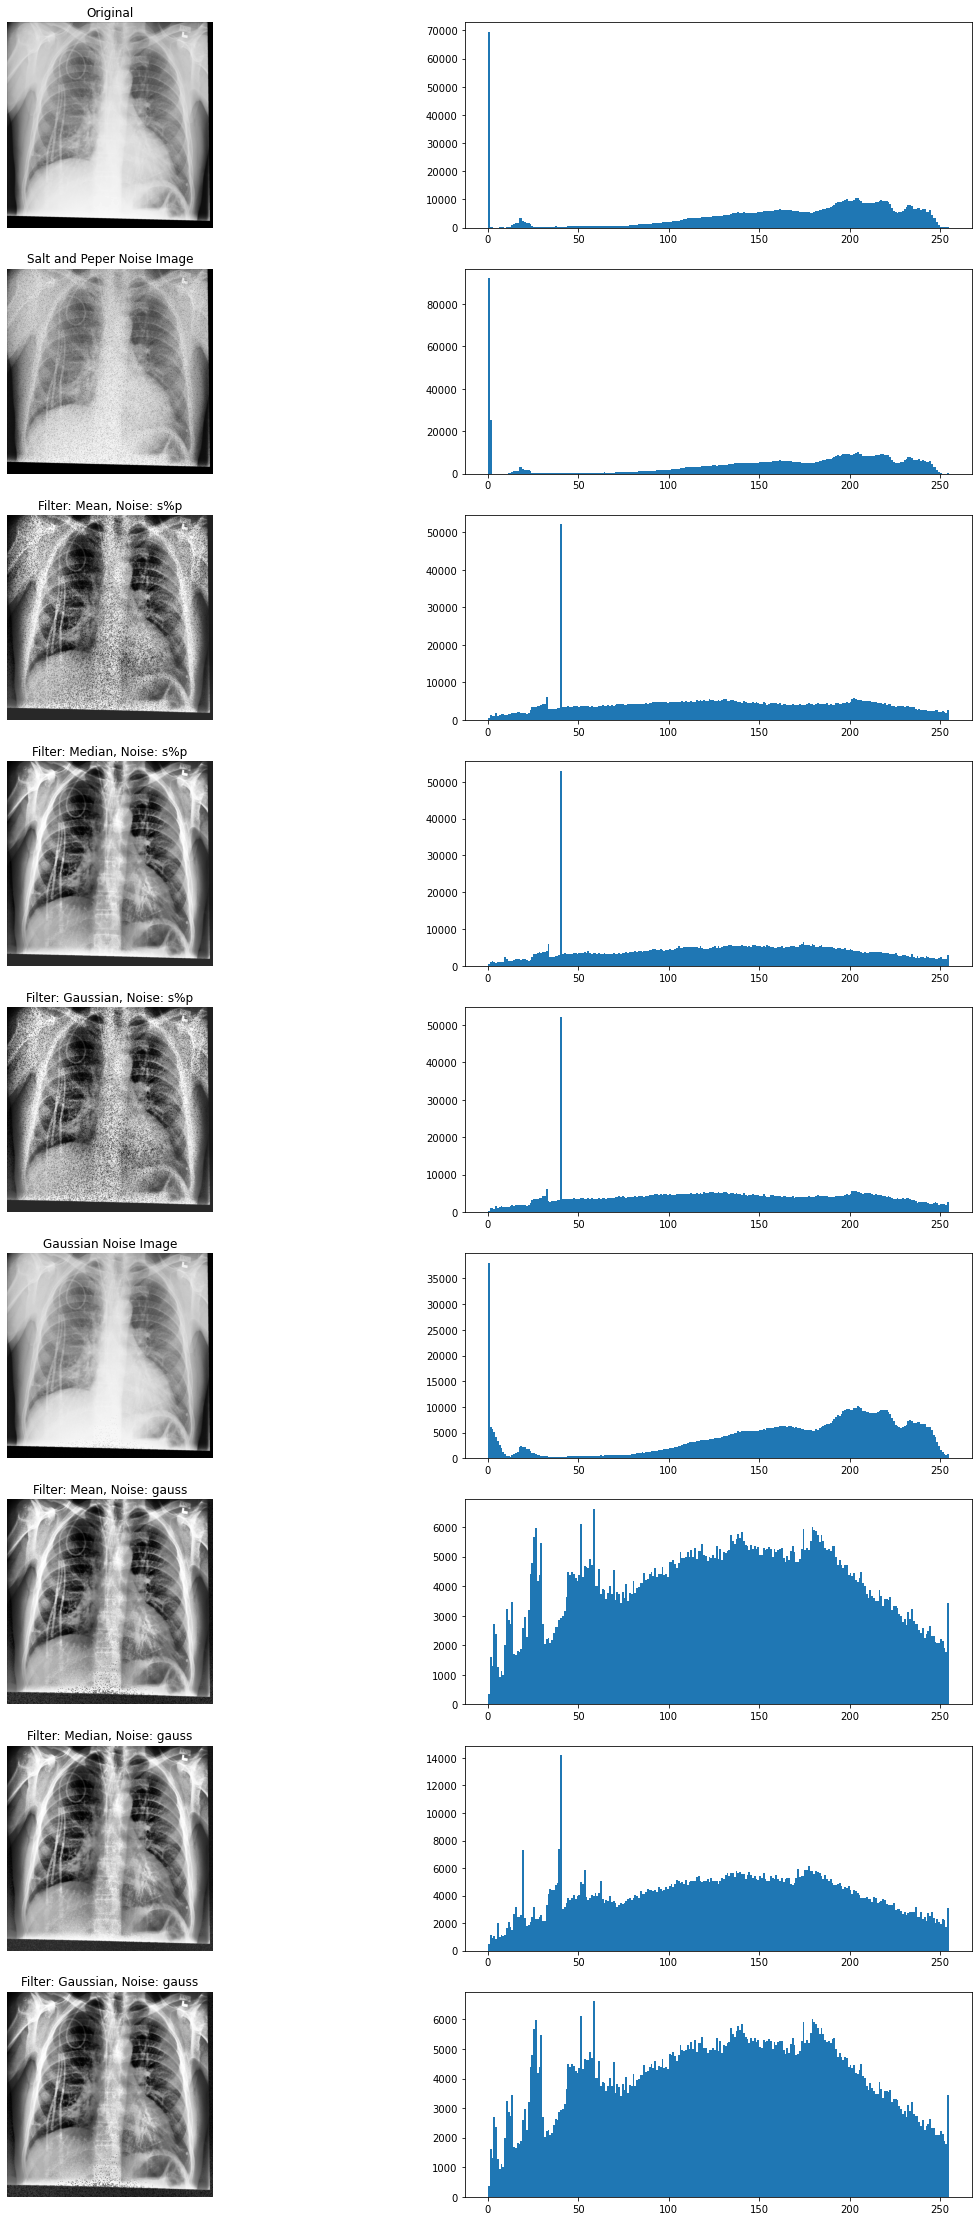

In [11]:
clahe_plot(img1,20,0.05,'Image 1 Var set 1')

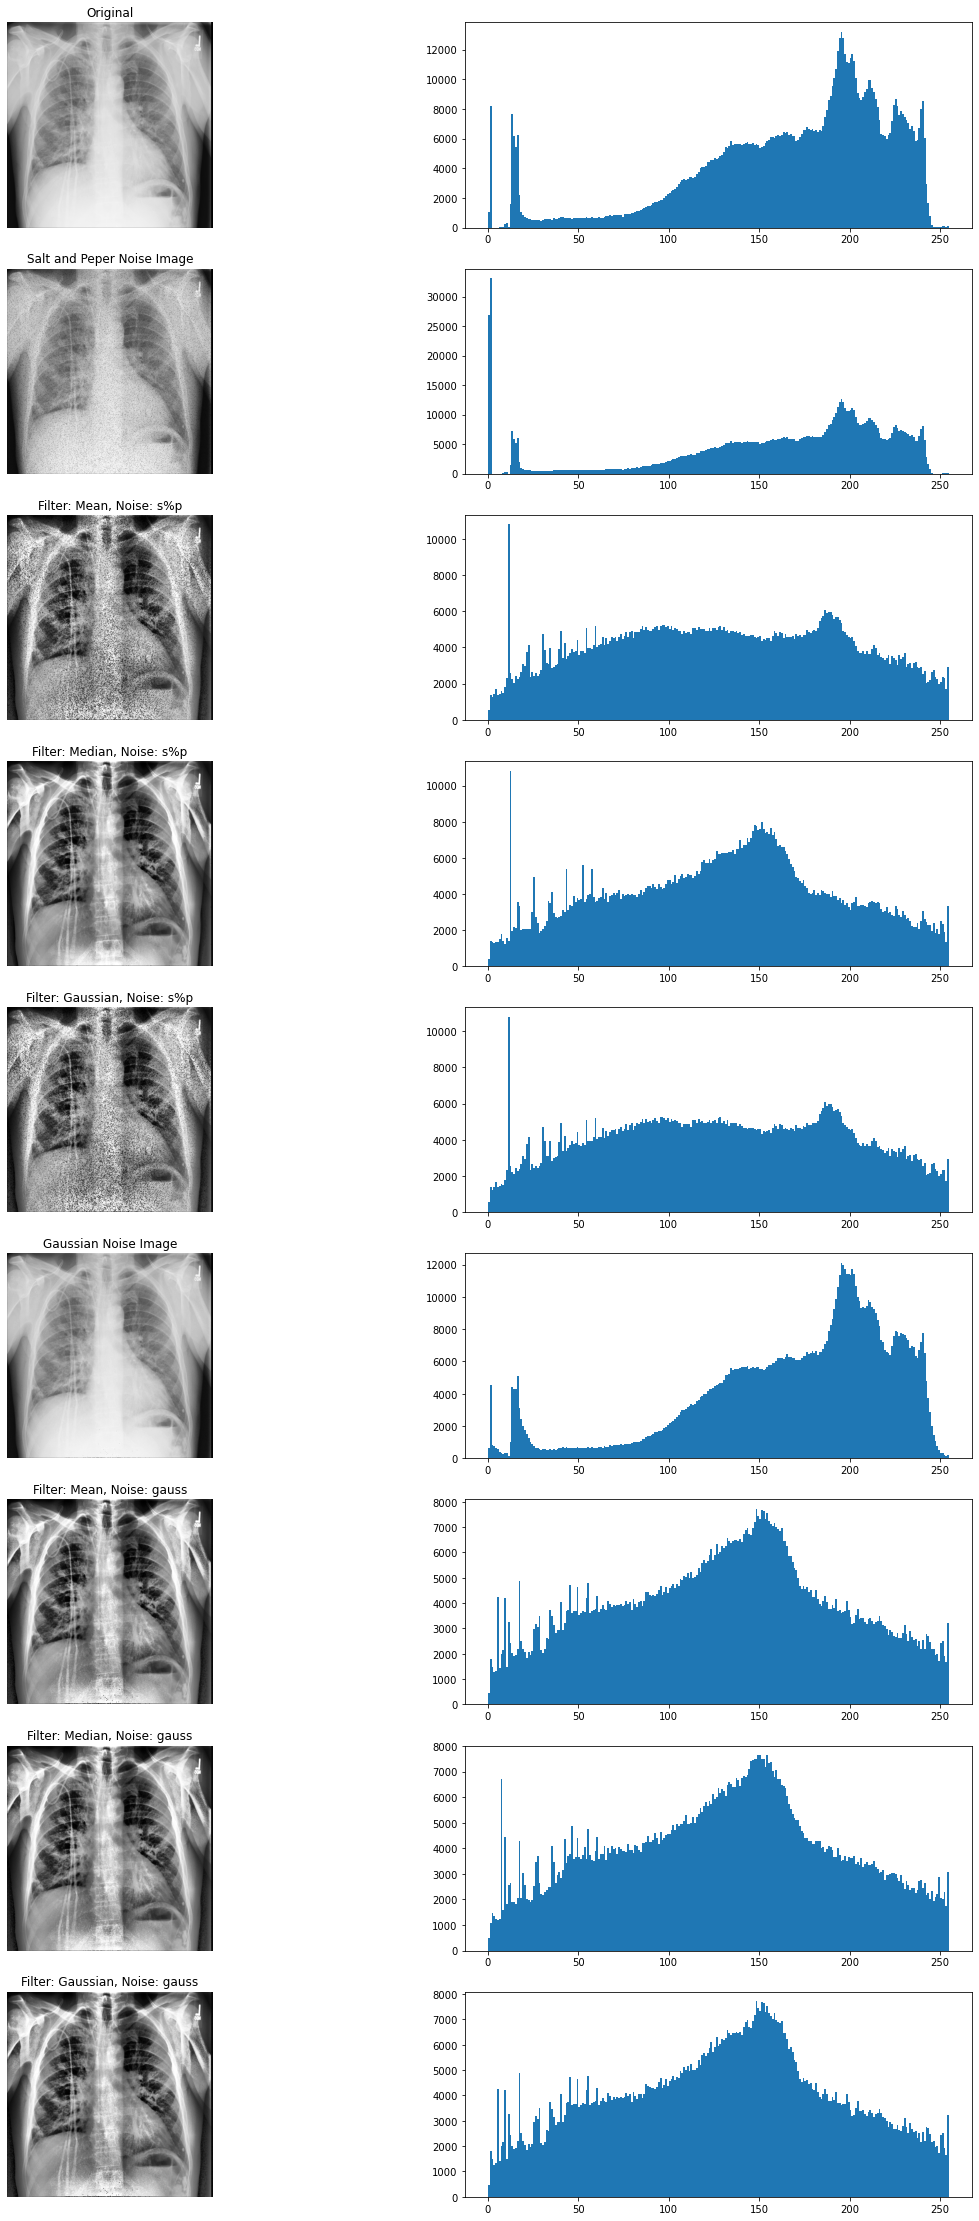

In [12]:
clahe_plot(img2,20,0.05,'Image 2 Var set 1')

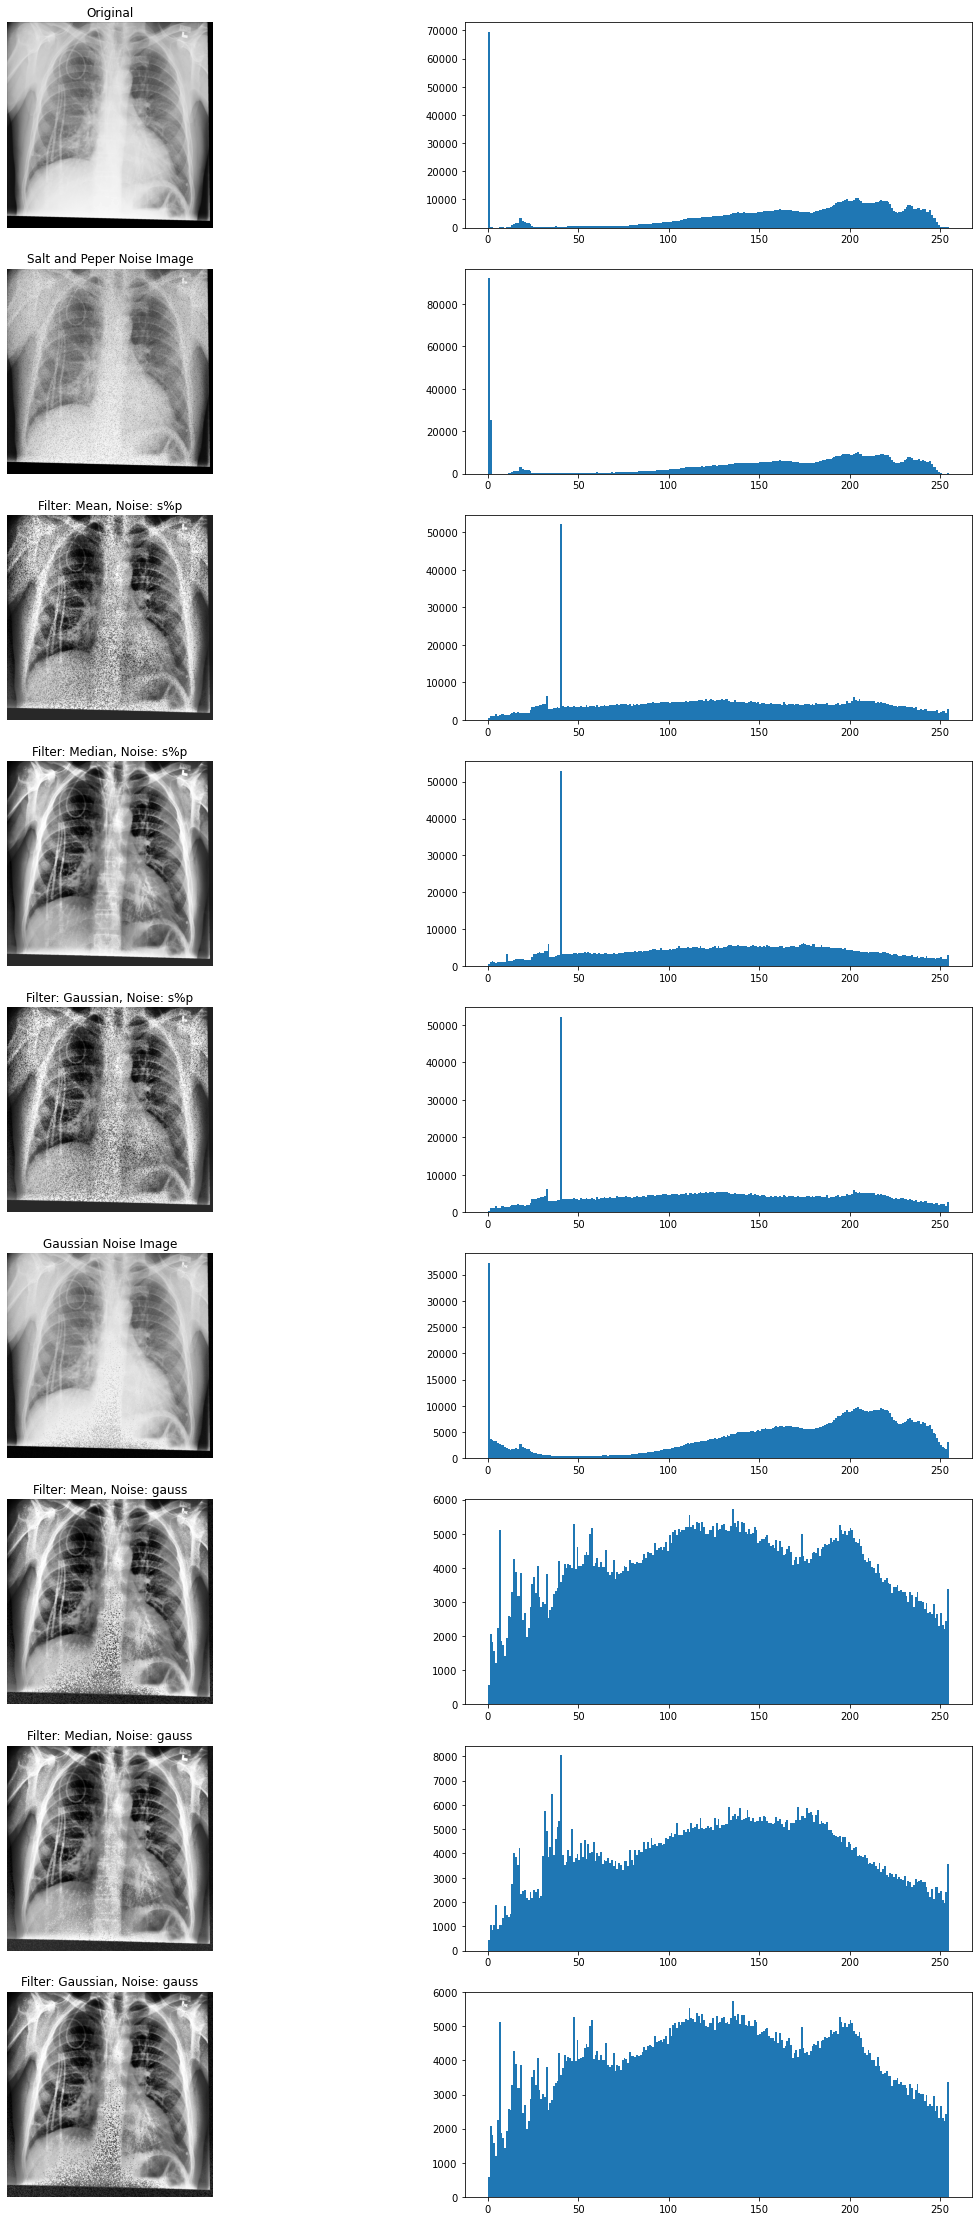

In [13]:
clahe_plot(img1,100,0.25,'Image 1 Var set 2')

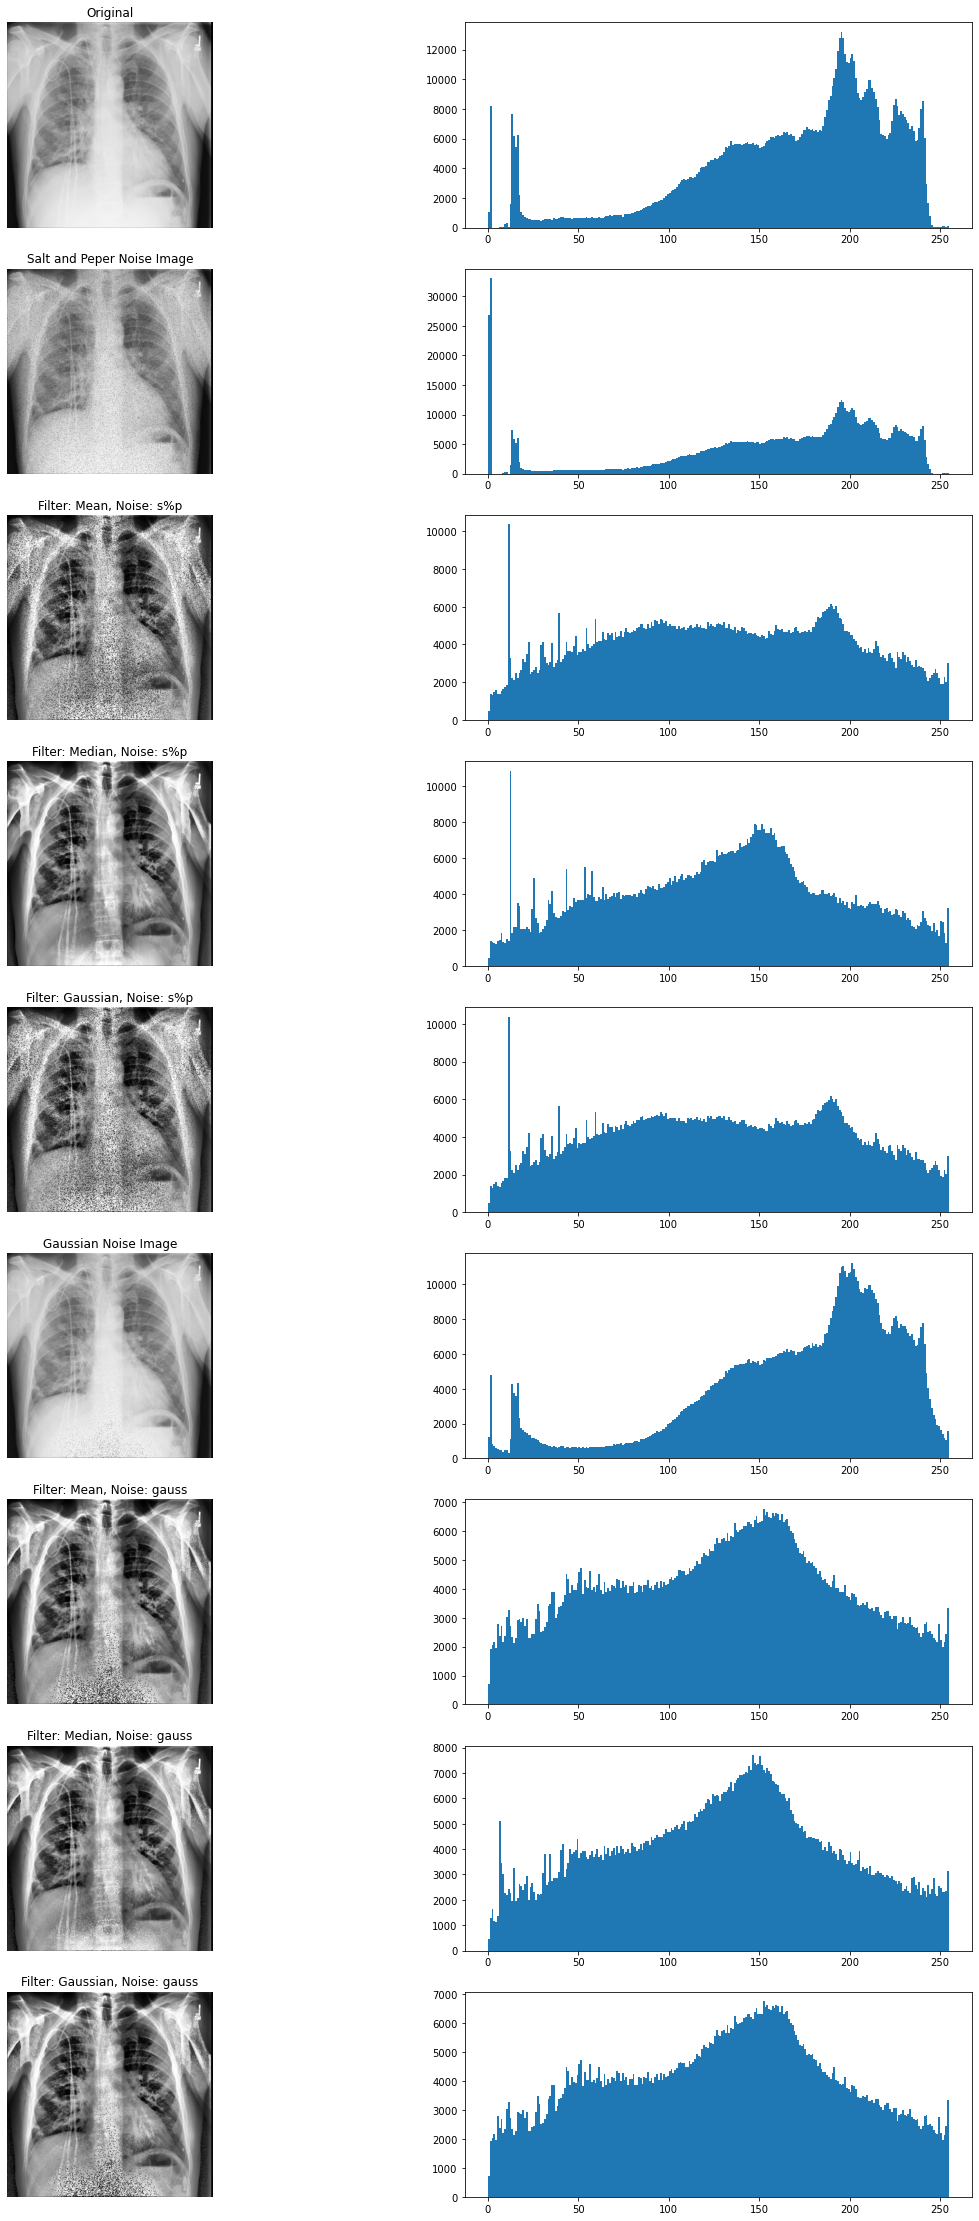

In [14]:
clahe_plot(img2,100,0.25,'Image 2 Var set 2')